<a href="https://colab.research.google.com/github/IDeal7/ML/blob/master/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)           # 버전 확인용

2.2.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()        # load_data() 함수 호출 시 네 개의 Numpy 배열이 반환된다. Numpy는 28*28 ,label은 0~9(class)

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']   # class 이름 설정

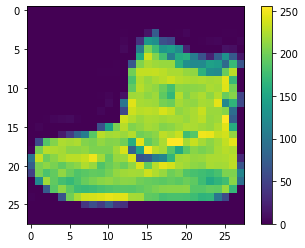

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()            # 픽셀이 0~255 사이이므로 0~1 사이로 바꿔야한다.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

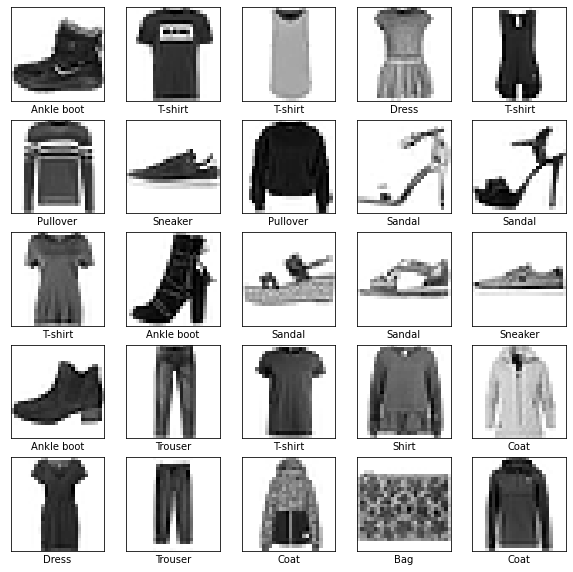

In [26]:
plt.figure(figsize=(10,10))
for i in range(25) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),      # 2차원 배열을 1차원 배열로 변환한다.
    keras.layers.Dense(128,activation = 'relu'),    # 128개의 노드를 가진다.
    keras.layers.Dense(10, activation = 'softmax')  # 10개의 노드로 10개의 확률을 보여준다.                         
])

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델을 컴파일 하는 과정에 설정을 추가한다. 최적화, 손실함수(오차 측정), 지표

In [41]:
model.fit(train_images, train_labels, epochs=10) # 훈련 데이터 학습!!

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4496 - accuracy: 0.8418
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4394 - accuracy: 0.8456
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4310 - accuracy: 0.8476
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4234 - accuracy: 0.8512
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4170 - accuracy: 0.8527
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4113 - accuracy: 0.8550
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4062 - accuracy: 0.8567
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4010 - accuracy: 0.8577
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3960 - accuracy: 0.8606
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.392

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)     # verbose가 클수록 진행 사항을 잘 보여주지 않는다.
print('\n 테스트 정확도 : ', test_acc)

313/313 - 0s - loss: 0.4315 - accuracy: 0.8439

 테스트 정확도 :  0.8439000248908997


In [44]:
predictions = model.predict(test_images)
predictions[0]

array([3.5815498e-07, 4.4735140e-09, 3.4731868e-06, 1.3920337e-06,
       5.0150102e-06, 1.4112604e-01, 1.5416590e-05, 2.0973341e-01,
       2.8378540e-03, 6.4627707e-01], dtype=float32)

In [46]:
np.argmax(predictions[0])            # epoch를 5로 줬더니 테스트 세트 0번 이미지는 7이 나왔다 그래서 epoch를 올려서 한 번 더했다. 시무룩.

9

In [39]:
test_labels[0]                       # 사실 9이다. 이것도 못 맞추는 바보 컴퓨터;

9

In [47]:
sum(predictions[0])                 # 다 더하니까 1이 넘었다는 사실! ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

1.0000000317802398